<a href="https://colab.research.google.com/github/dhikshi06/new/blob/main/DHIKSHIDHA_(RA2311027040006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: /kaggle/input/uber-ride-analytics-dashboard


In [ ]:
import pandas as pd
import os

# Define the path to the dataset
path = '/content'

# Adjust path to the actual file inside the dataset folder
file_path = os.path.join(path, 'ncr_ride_bookings.csv')  # <- Change filename if needed

# Load dataset
data = pd.read_csv(file_path)
print(data.head())

         Date      Time    Booking ID   Booking Status   Customer ID  \
0  2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1  2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2  2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3  2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4  2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   

    Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
0          eBike          Palam Vihar            Jhilmil       NaN       NaN   
1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
4           Bike     Ghitorni Village        Khan Market       5.3      19.6   

   ...  Reason for cancelling by Customer Cancelled Rides by Driver  \
0  ...         

In [ ]:
# Define output column
output_col = 'Booking Value'

# Output preprocessor
preprocessor_out = ColumnTransformer([
    ("num", num_transformer, [output_col])
])
preprocessor_out.set_output(transform="pandas")

# Preprocess output
y = preprocessor_out.fit_transform(data)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Display few rows
print("X_train sample:")
print(X_train.head())

print("\ny_train sample:")
print(y_train.head())


X_train sample:
        num__Avg VTAT  num__Avg CTAT  num__Booking Value  num__Ride Distance  \
104025      -1.636774       1.300924           -0.353248            0.470535   
5415        -1.719212       0.061347           -0.926185           -1.775186   
75612       -1.471897       1.750440           -1.198867            1.268186   
138169       1.688242      -1.818450           -1.238696           -1.336088   
87184        1.633283       0.701568            1.478926           -1.401043   

        num__Driver Ratings  num__Customer Rating  cat__Vehicle Type_Auto  \
104025         4.913137e-01             -0.593449                     1.0   
5415          -2.581981e-15              0.000000                     0.0   
75612          1.654134e+00             -0.883525                     0.0   
138169        -9.622123e-01             -0.303373                     0.0   
87184          2.006085e-01             -0.883525                     1.0   

        cat__Vehicle Type_Bike  cat__Veh

#T2Simple Linear Regression

Slope (m): 0.6
Intercept (c): 2.2


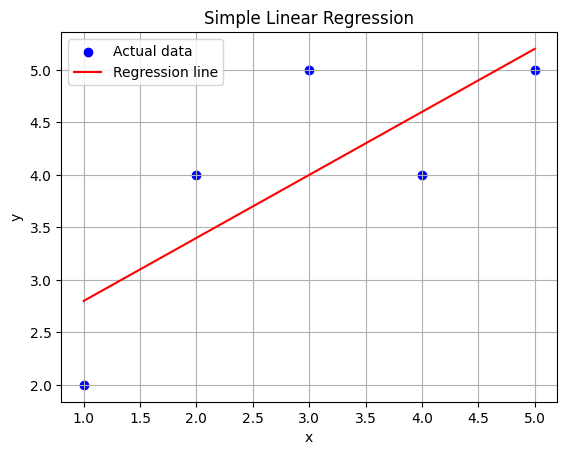

In [ ]:
# PROGRAM 2 — Simple Linear Regression Example with Graph
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
data = { 'x': [1, 2, 3, 4, 5],
         'y': [2, 4, 5, 4, 5] }
df = pd.DataFrame(data)

# Features and labels
X = df[['x']]
Y = df[['y']]

# Fit the model
model = LinearRegression()
model.fit(X, Y)

# Predictions
y_pred = model.predict(X)

# Output slope and intercept
print("Slope (m):", model.coef_[0][0])
print("Intercept (c):", model.intercept_[0])

# Plotting
plt.scatter(X, Y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.title('Simple Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#T3: Cross Validation
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the dataset directly from the file path
file_path = '/content/ncr_ride_bookings.csv'

data = pd.read_csv(file_path)

# Step 2: Select features and target for classification
# Features: use numeric + categorical encoded as integers
features = ['Ride Distance', 'Avg VTAT', 'Avg CTAT', 'Driver Ratings', 'Customer Rating']

# Convert features to numeric (handle errors)
for col in features:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with missing feature values
data = data.dropna(subset=features + ['Booking Value'])

X = data[features]

# Step 3: Create binary target: High Booking Value = 1, else 0
median_booking_value = data['Booking Value'].median()
y = (data['Booking Value'] > median_booking_value).astype(int)

# Step 4: For categorical features (if any), encode
# Here all are numeric, so no encoding needed

# Step 5: Define classifiers
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = LogisticRegression(max_iter=1000)

# Step 6: Define KFold cross-validation
k_folds = KFold(n_splits=10, shuffle=True, random_state=42)

# Step 7: Cross validation scores
scores1 = cross_val_score(clf1, X, y, cv=k_folds)
scores2 = cross_val_score(clf2, X, y, cv=k_folds)

# Step 8: Print results
print("Decision Tree Cross Validation Scores:", scores1)
print("Logistic Regression Cross Validation Scores:", scores2)
print("Decision Tree Average CV Score:", scores1.mean())
print("Logistic Regression Average CV Score:", scores2.mean())
print("Number of CV Scores used in Average (DT):", len(scores1))
print("Number of CV Scores used in Average (LR):", len(scores2))

Decision Tree Cross Validation Scores: [0.48935484 0.50451613 0.50483871 0.50526882 0.50107527 0.5055914
 0.49731183 0.5044086  0.49946237 0.50741935]
Logistic Regression Cross Validation Scores: [0.50075269 0.5        0.50301075 0.50376344 0.49612903 0.50107527
 0.49989247 0.50290323 0.50150538 0.49741935]
Decision Tree Average CV Score: 0.5019247311827957
Logistic Regression Average CV Score: 0.5006451612903227
Number of CV Scores used in Average (DT): 10
Number of CV Scores used in Average (LR): 10


In [ ]:
#Program Codes for Unit - II
#T4: Performance Metrics
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

# Step 1: Download and load dataset
file_path = os.path.join('/content', "ncr_ride_bookings.csv")

data = pd.read_csv(file_path)

# Step 2: Select relevant features and target columns
features = ['Ride Distance', 'Avg VTAT', 'Avg CTAT', 'Driver Ratings', 'Customer Rating']
for col in features + ['Booking Value']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with missing values in these columns
data = data.dropna(subset=features + ['Booking Value'])

# Step 3: Create binary classification target: High Booking Value (1) vs Low (0)
median_booking = data['Booking Value'].median()
data['high_booking_value'] = (data['Booking Value'] > median_booking).astype(int)

# Step 4: Prepare classification dataset
X = data[features]
y_class = data['high_booking_value']  # Classification target
y_reg = data['Booking Value']         # Regression target

# Step 5: Split into train and test sets
X_train, X_test, y_class_train, y_class_test = train_test_split(X, y_class, test_size=0.2, random_state=42)
_, _, y_reg_train, y_reg_test = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Step 6: Decision Tree Classifier for classification
dt = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt.fit(X_train, y_class_train)
y_dt_pred = dt.predict(X_test)
accuracy_dt = accuracy_score(y_class_test, y_dt_pred)
print("Decision Tree Classifier Accuracy:", accuracy_dt)

# Step 7: Linear Regression for regression target
lrr = LinearRegression()
lrr.fit(X_train, y_reg_train)
y_lrr_pred = lrr.predict(X_test)

mse = mean_squared_error(y_reg_test, y_lrr_pred)
r2 = r2_score(y_reg_test, y_lrr_pred)
print("Linear Regression MSE:", mse)
print("Linear Regression R2 Score:", r2)

Decision Tree Classifier Accuracy: 0.5039247311827957
Linear Regression MSE: 159521.65508115015
Linear Regression R2 Score: -6.356350924585641e-05


In [ ]:
#T5: Multiple Linear Regression

import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Download and load the dataset
file_path = os.path.join('/content', "ncr_ride_bookings.csv")

data = pd.read_csv(file_path)

# Step 2: Select features and target
features = ['Ride Distance', 'Avg VTAT', 'Avg CTAT', 'Driver Ratings', 'Customer Rating']
for col in features + ['Booking Value']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with missing values in features and target
data = data.dropna(subset=features + ['Booking Value'])

X = data[features]
y = data['Booking Value']

# Step 3: Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Step 4: Train Multiple Linear Regression model
lrr = LinearRegression()
lrr.fit(X_train, y_train)

# Step 5: Predict on test data
y_pred = lrr.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression MSE:", mse)
print("Linear Regression R2:", r2)

Linear Regression MSE: 158039.9107755548
Linear Regression R2: -0.0002769399972024633


In [ ]:
#T6: Logistic Regression

import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Download and load the dataset
file_path = os.path.join('/content', "ncr_ride_bookings.csv")

data = pd.read_csv(file_path)

# Step 2: Select features and preprocess
features = ['Ride Distance', 'Avg VTAT', 'Avg CTAT', 'Driver Ratings', 'Customer Rating']
for col in features + ['Booking Value']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop missing values
data = data.dropna(subset=features + ['Booking Value'])

# Step 3: Create binary classification target
median_booking = data['Booking Value'].median()
data['high_booking_value'] = (data['Booking Value'] > median_booking).astype(int)

X = data[features]
y = data['high_booking_value']

# Step 4: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Step 5: Train logistic regression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Step 6: Predict and evaluate
y_lr_pred = lr.predict(X_test)

print("y_test shape:", y_test.shape)
print("y_lr_pred shape:", y_lr_pred.shape)

accuracy_lr = accuracy_score(y_test, y_lr_pred)
print("Logistic Regression Accuracy:", accuracy_lr)

y_test shape: (18600,)
y_lr_pred shape: (18600,)
Logistic Regression Accuracy: 0.5073655913978494


In [ ]:
#Additional Codes
#Decision_Tree

import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Download and load dataset
file_path = os.path.join('/content', "ncr_ride_bookings.csv")

data = pd.read_csv(file_path)

# Step 2: Select features and preprocess
features = ['Ride Distance', 'Avg VTAT', 'Avg CTAT', 'Driver Ratings', 'Customer Rating']
for col in features + ['Booking Value']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop missing values in features and target
data = data.dropna(subset=features + ['Booking Value'])

# Step 3: Create binary classification target for Decision Tree
median_booking = data['Booking Value'].median()
data['high_booking_value'] = (data['Booking Value'] > median_booking).astype(int)

X = data[features]
y = data['high_booking_value']

# Step 4: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Step 5: Initialize and train Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=2)
dt.fit(X_train, y_train)

# Step 6: Make predictions and evaluate accuracy
y_dt_pred = dt.predict(X_test)

print("y_test shape:", y_test.shape)
print("y_dt_pred shape:", y_dt_pred.shape)

accuracy_dt = accuracy_score(y_test, y_dt_pred)
print("Decision Tree Classifier Accuracy:", accuracy_dt)

y_test shape: (18600,)
y_dt_pred shape: (18600,)
Decision Tree Classifier Accuracy: 0.5040322580645161


In [ ]:
import kagglehub
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from statsmodels.stats.contingency_tables import mcnemar

# Step 1: Download and load dataset
file_path = os.path.join('/content', "ncr_ride_bookings.csv")

data = pd.read_csv(file_path)

# Step 2: Select features and preprocess
features = ['Ride Distance', 'Avg VTAT', 'Avg CTAT', 'Driver Ratings', 'Customer Rating']
for col in features + ['Booking Value']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with missing values
data = data.dropna(subset=features + ['Booking Value'])

# Step 3: Create binary classification target
median_booking = data['Booking Value'].median()
data['high_booking_value'] = (data['Booking Value'] > median_booking).astype(int)

X = data[features]
y = data['high_booking_value']

# Step 4: Split train/test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Step 5: Train Decision Tree classifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=2)
dt.fit(X_train, y_train)
y_dt_pred = dt.predict(X_test)

# Step 6: Train Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)

# Step 7: Print accuracies
print("Decision Tree Accuracy:", accuracy_score(y_test, y_dt_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_lr_pred))

# Step 8: Build contingency table for McNemar's test
table = [[0, 0], [0, 0]]

for i in range(len(y_test)):
    if y_test.iloc[i] == y_dt_pred[i] and y_test.iloc[i] != y_lr_pred[i]:
        table[0][1] += 1  # DT correct, LR wrong
    elif y_test.iloc[i] != y_dt_pred[i] and y_test.iloc[i] == y_lr_pred[i]:
        table[1][0] += 1  # LR correct, DT wrong

for i in range(len(y_test)):
    if y_test.iloc[i] == y_dt_pred[i] and y_test.iloc[i] == y_lr_pred[i]:
        table[0][0] += 1  # Both correct
    elif y_test.iloc[i] != y_dt_pred[i] and y_test.iloc[i] != y_lr_pred[i]:
        table[1][1] += 1  # Both wrong

print("Contingency Table (McNemar):", table)

# Step 9: Run McNemar's test
result = mcnemar(table, exact=True)
print("McNemar’s Test Statistic:", result.statistic)
print("McNemar’s Test p-value:", result.pvalue)

if result.pvalue < 0.05:
    print("Significant difference between models (reject H0)")
else:
    print("No significant difference between models (fail to reject H0)")

Decision Tree Accuracy: 0.5040322580645161
Logistic Regression Accuracy: 0.5073655913978494
Contingency Table (McNemar): [[4810, 4565], [4627, 4598]]
McNemar’s Test Statistic: 4565.0
McNemar’s Test p-value: 0.5246185602506108
No significant difference between models (fail to reject H0)
